In [2]:

import requests
import json
from pprint import pp
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

use read json to get the json into a data frame. try and play around with different info you 
can manipulate with the Data frame

Some ideas:

1. Plot all of the starships with a crew over 500 
2. Plot all of the starships with a crew over 500 and hyperdrive rating of 2
3. Put the name of the starship as the index column
4. Plot the price of each starship in relation to the cargo capacity
5. Plot the total number of charachters for each eye color 
6. Plot the height for each charachters

In [8]:
url='https://swapi.dev/api/starships/?page=1'
resposne=requests.get(url)
r=resposne.json()

In [ ]:
total_pages=4
url='https://swapi.dev/api/starships/?page='
data=[]
for i in range(1,total_pages+1):
    resposne=requests.get(url+str(i))
    r=resposne.json()
    data.append(r)
pp(data)

In [ ]:
cleaned_dt=[]
for result in data:
    for data in result['results']:
        cleaned_dt.append(data)
pp(cleaned_dt)

In [11]:
df1=pd.DataFrame.from_dict(cleaned_dt)

In [12]:
df1.shape

(36, 18)

use read json to get the json into a data frame. try and play around with different info you 
can manipulate with the Data frame

Some ideas:

1. Plot all of the starships with a crew over 500 
2. Plot all of the starships with a crew over 500 and hyperdrive rating of 2
3. Put the name of the starship as the index column
4. Plot the price of each starship in relation to the cargo capacity
5. Plot the total number of charachters for each eye color 
6. Plot the height for each charachters

 Plot the price of each starship in relation to the cargo capacity

df1['cost_in_credits'].map(int)

In [13]:
df1.columns

Index(['name', 'model', 'manufacturer', 'cost_in_credits', 'length',
       'max_atmosphering_speed', 'crew', 'passengers', 'cargo_capacity',
       'consumables', 'hyperdrive_rating', 'MGLT', 'starship_class', 'pilots',
       'films', 'created', 'edited', 'url'],
      dtype='object')

yogita crew over 500 code

C:\Users\ngupt\AppData\Local\Temp\ipykernel_24156\3278209374.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new['crew']=df_new['crew'].str.replace(",","").str.replace(r'\d*-',"").str.replace("unknown","0").astype(int)


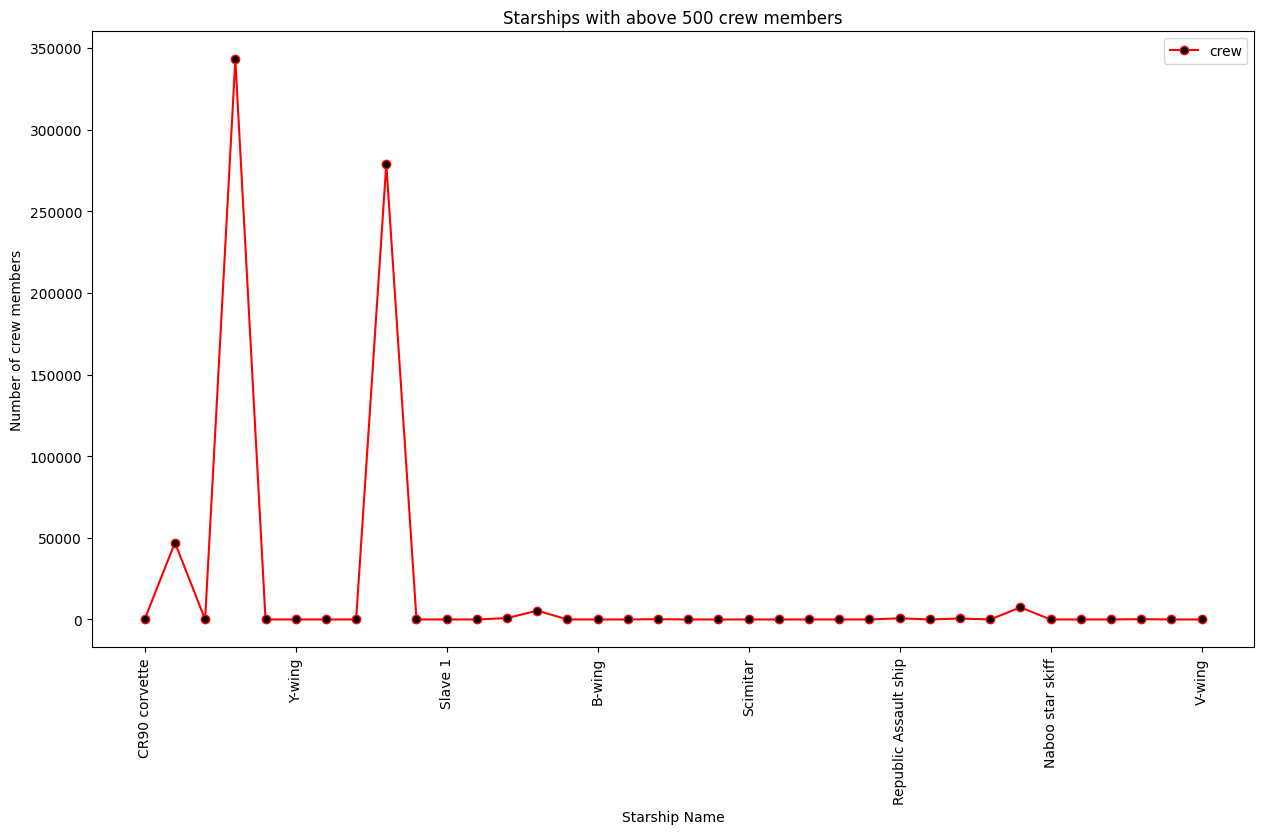

In [30]:
df_new=df1
df_new['crew']=df_new['crew'].str.replace(",","").str.replace(r'\d*-',"").str.replace("unknown","0").astype(int)
df_new['crew']
df_new[df_new['crew'] > 500]
df_new.plot(kind='line',x='name',y='crew',color='red',rot=90,marker='o',markerfacecolor='black',figsize=(15,8))

plt.title("Starships with above 500 crew members")
plt.ylabel("Number of crew members")
plt.xlabel("Starship Name")
plt.show()


In [34]:
df_cost=df1

In [ ]:
df_cost['cost_in_credits']

In [37]:
df_cost[['cost_in_credits']]=df_cost[['cost_in_credits']].replace('unknown',0)
df_cost[['cargo_capacity']]=df_cost[['cargo_capacity']].replace('unknown',0)

In [38]:
df_cost.columns

Index(['name', 'model', 'manufacturer', 'cost_in_credits', 'length',
       'max_atmosphering_speed', 'crew', 'passengers', 'cargo_capacity',
       'consumables', 'hyperdrive_rating', 'MGLT', 'starship_class', 'pilots',
       'films', 'created', 'edited', 'url'],
      dtype='object')

In [39]:
df_cost[['cargo_capacity']]=df_cost[['cargo_capacity']].astype('int64')
df_cost[['cost_in_credits']]=df_cost[['cost_in_credits']].astype('int64')
#df_cc['cargo_capacity'].dtypes

In [43]:
df_cost[['cargo_capacity','cost_in_credits']]=df_cost[['cargo_capacity','cost_in_credits']].divide(100)

In [ ]:
df_cost[['cargo_capacity','cost_in_credits']]

Text(0.5, 0, 'Cost')

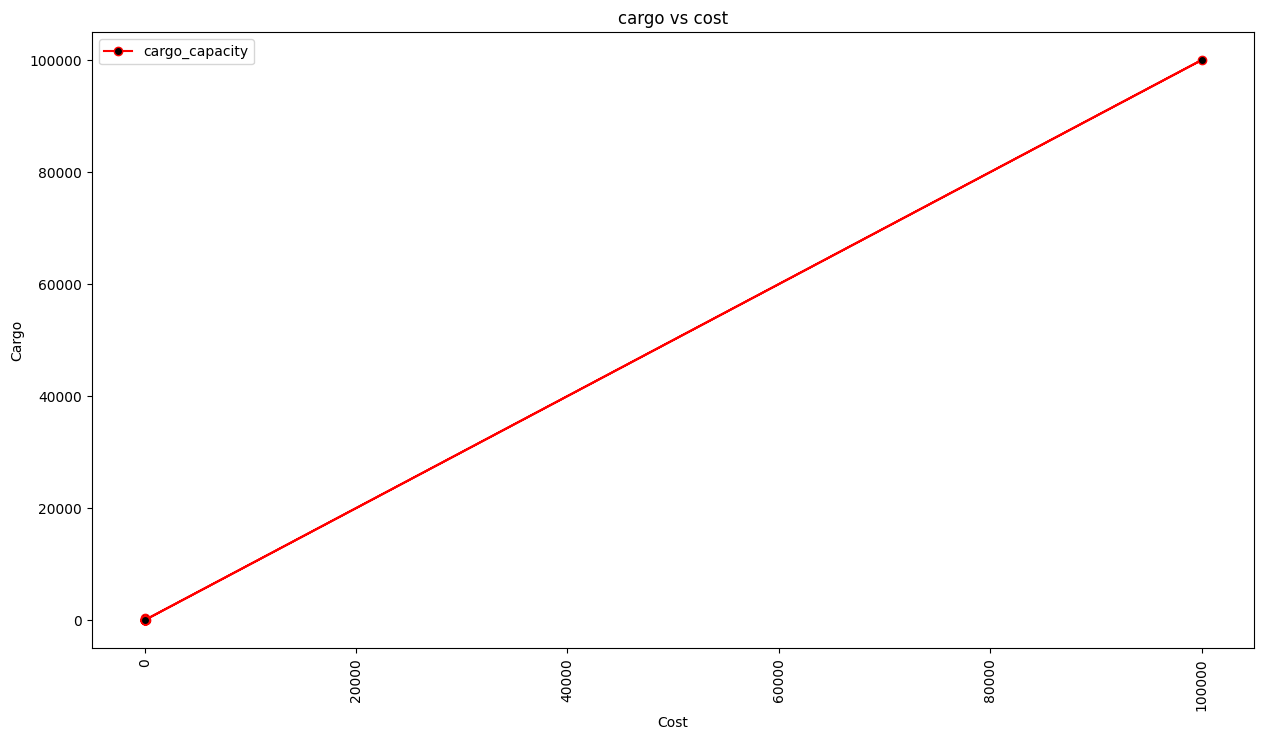

In [45]:

#df_cost_capacity['cargo_capacity','cost_in_credits'].plot.line()
df_cost[['cargo_capacity','cost_in_credits']].plot(kind='line',x='cost_in_credits',y='cargo_capacity',color='red',rot=90,marker='o',markerfacecolor='black',figsize=(15,8))
plt.title('cargo vs cost')
plt.ylabel('Cargo')
plt.xlabel('Cost')
# plt.show()

Plot all of the starships with a crew over 500

In [ ]:
df1_re_unknown=df1['crew'].str.replace('unknown',0)
#df1_re_unknown=df1[(df1['crew']!='unknown')]
df_new=df1['crew'].str.replace(",","")
#here we get the df_new as variable instead of df
df_new=[i.split("-")[-1] for i in df_new]
type(df_new)
df_crew = pd.DataFrame(df_new)
df_crew.dtypes

0    object
dtype: object

In [ ]:
df_crew

,0
0,165
1,47060
2,5
3,342953
4,4
5,2
6,1
7,1
8,279144
9,6


In [ ]:
df_crew_mod=df1[['crew_over','model']]

In [ ]:
df_crew_mod.plot(marker='o')

plt.title('model vs crew')
plt.ylabel('Crew')
plt.xlabel('Model')
plt.show()

3. Put the name of the starship as the index column

In [ ]:
df1.set_index('model',inplace=True)
df1


5. Plot the total number of charachters for each eye color 

Plot the height for each charachters

In [ ]:
df1['length']=df1['length'].str.replace(',', '')
df1['length']

model
CR90 corvette                                  150
Imperial I-class Star Destroyer               1600
Sentinel-class landing craft                    38
DS-1 Orbital Battle Station                 120000
YT-1300 light freighter                      34.37
BTL Y-wing                                      14
T-65 X-wing                                   12.5
Twin Ion Engine Advanced x1                    9.2
Executor-class star dreadnought              19000
GR-75 medium transport                          90
Firespray-31-class patrol and attack          21.5
Lambda-class T-4a shuttle                       20
EF76 Nebulon-B escort frigate                  300
MC80 Liberty type Star Cruiser                1200
RZ-1 A-wing Interceptor                        9.6
A/SF-01 B-wing starfighter                    16.9
Consular-class cruiser                         115
Lucrehulk-class Droid Control Ship            3170
N-1 starfighter                                 11
J-type 327 Nubian royal s

In [ ]:
df1['length']=df1['length'].map(float)

<AxesSubplot: xlabel='model'>

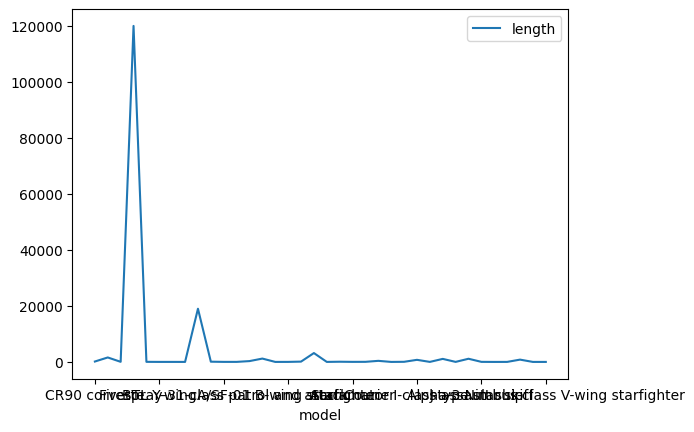

In [ ]:
df1[['name','length']].plot.line()